##  **Bias and Fairness in Educational AI – A Practical Analysis Using Python**

This project presents a working model to analyze and mitigate algorithmic bias in Artificial Intelligence systems, with a special focus on educational and socioeconomic domains. Leveraging real-world datasets — the Adult Income dataset (`adult.csv`) and the Student Academic Performance dataset from Kaggle — the project evaluates how predictive models behave across different demographic groups such as gender, ethnicity, and parental background.

This notebook is developed under the guidance of  
 **Dr. Ayush Bijoura**  
Associate Professor, Department of Computer Science and Engineering  
**SRM University – Andhra Pradesh**

---

##  Datasets Used

-  The **Adult Income Dataset** is used to predict whether an individual earns above or below \$50K/year and includes features such as gender, race, and education — commonly used in fairness research.
-  The **Student Academic Performance Dataset** captures academic scores, parental education, study habits, and other attributes that influence student GPA, allowing analysis of fairness in educational prediction tasks.

---

##  Key Analysis Sections

-  Gender Distribution  
-  Ethnicity Distribution  
-  Parent Education Levels  
-  Grade and GPA Distribution  
-  Income Class Distribution  
-  Fairness Metric Evaluation (Demographic Parity & Equalized Odds)

Each section uses visualizations and summary statistics to explore potential imbalances that could lead to biased model predictions.

---

##  Methodology & Tools

This project is built entirely using Python and includes:

- Exploratory Data Analysis using Pandas, Matplotlib, and Seaborn
- Model training using Logistic Regression (via Scikit-learn)
- Fairness metric evaluation using:
  - Demographic Parity Difference
  - Equalized Odds Difference
- Bias mitigation using the Reweighing technique from IBM’s AIF360 library
- Supplementary fairness analysis using Microsoft’s Fairlearn

---

##  Project Objectives

- Quantify and visualize bias in education and income-based ML models
- Understand how model performance varies across demographic subgroups
- Apply fairness-aware techniques to reduce discriminatory outcomes
- Promote ethical AI practices in educational systems and beyond

---

This notebook offers a comprehensive and practical demonstration of fairness-aware AI, showcasing how even simple predictive models can reflect real-world disparities—and how we, as technologists, can respond with fairness-driven solutions.


In [ ]:
# Clean and lightweight installation for Fairness project
!pip install -q fairlearn
!pip install -q aif360
!apt-get install -y libgomp1  # Required by AIF360


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgomp1 is already the newest version (12.3.0-1ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
import numpy as np

from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
adult_df = pd.read_csv("adult.csv")
student_df = pd.read_csv("Student_performance_data _.csv")

In [ ]:
gender_mapping = {
    "Male": 0, "Female": 1
}

ethnicity_mapping = {
    "White": 0, "Black": 1, "Asian-Pac-Islander": 2, "Amer-Indian-Eskimo": 3, "Other": 3
}

education_mapping = {
    "HS-grad": 1,
    "Some-college": 2, "Assoc-voc": 2, "Assoc-acdm": 2,
    "Bachelors": 3,
    "Masters": 4, "Doctorate": 4, "Prof-school": 4
}


In [ ]:
adult_df["ParentalGender"] = adult_df["sex"].map(gender_mapping)

adult_df["ParentalEthnicity"] = adult_df["race"].map(ethnicity_mapping)

adult_df["ParentalEducation"] = adult_df["education"].apply(lambda x: education_mapping.get(x, 0))

In [ ]:
adult_df.rename(columns={"age": "ParentalAge", "native.country": "ParentalCountry", "income": "ParentalIncome", "occupation": "ParentalOccupation"}, inplace=True)

adult_df.drop(columns=["education","education.num","sex","marital.status", "capital.gain","capital.loss","race","hours.per.week","workclass","fnlwgt","relationship"], inplace=True)

# Labels

In [ ]:
gender_labels = {0: "Male", 1: "Female"}
ethnicity_labels = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
education_labels = {0: "No Education", 1: "High School", 2: "Some College", 3: "Bachelor's", 4: "Higher"}

# Gender Distribution

/tmp/ipython-input-12-3903739842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=student_df, palette="coolwarm")


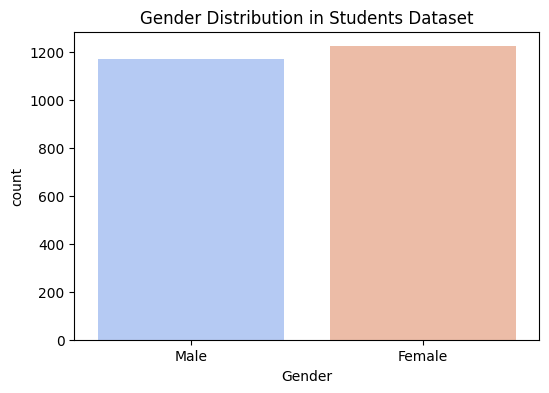

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=student_df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.title("Gender Distribution in Students Dataset")
plt.show()

/tmp/ipython-input-13-1808607033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ParentalGender", data=adult_df, palette="coolwarm")


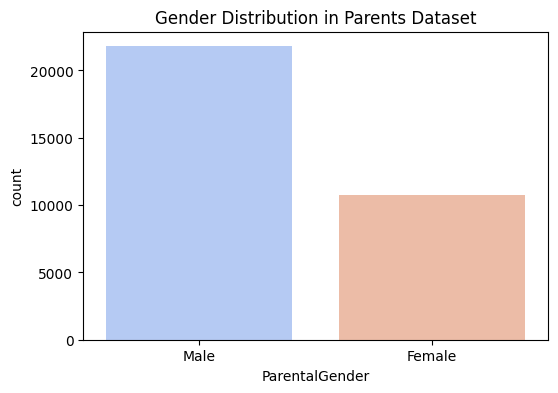

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="ParentalGender", data=adult_df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.title("Gender Distribution in Parents Dataset")
plt.show()

# Ethnicity Distribution

/tmp/ipython-input-14-1281619482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ethnicity", data=student_df, palette="coolwarm")


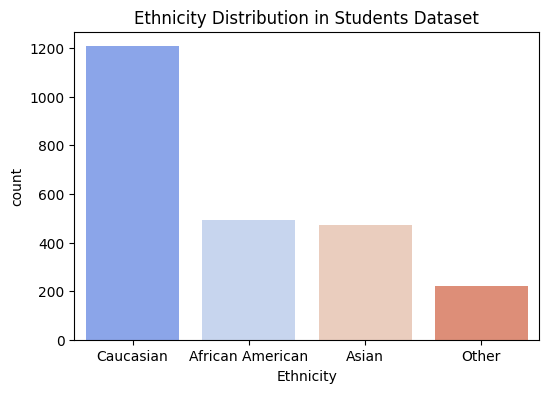

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Ethnicity", data=student_df, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Caucasian", "African American", "Asian", "Other"])
plt.title("Ethnicity Distribution in Students Dataset")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="ParentalEthnicity", data=adult_df, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Caucasian", "African American", "Asian", "Other"])
plt.title("Ethnicity Distribution in Parent Dataset")
plt.show()

NameError: name 'plt' is not defined

# Income Distribution

/tmp/ipython-input-15-3199021115.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ParentalIncome", data=adult_df, palette="coolwarm")


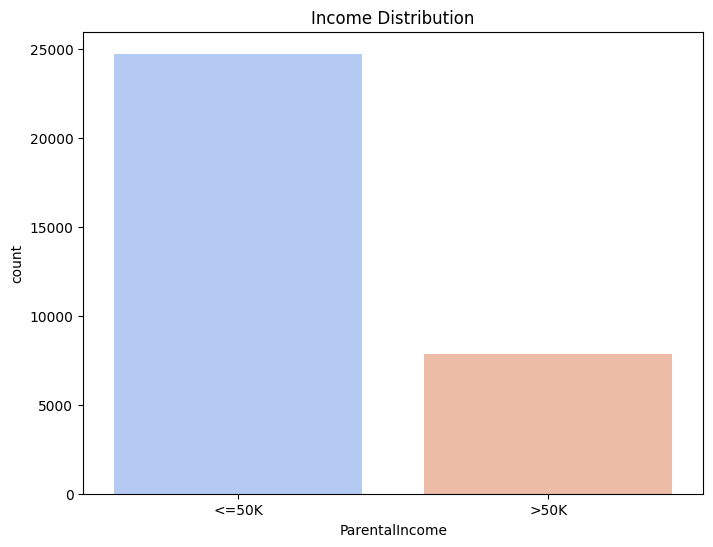

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="ParentalIncome", data=adult_df, palette="coolwarm")
plt.title("Income Distribution")
plt.show()

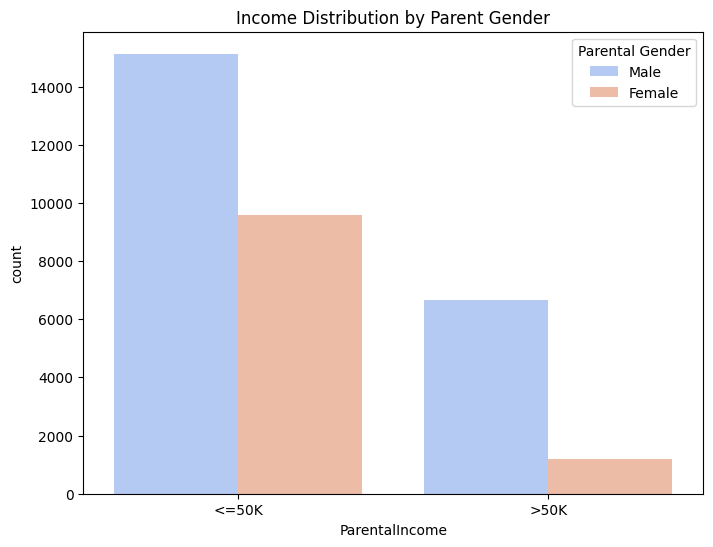

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ParentalIncome", hue="ParentalGender", data=adult_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Male", "Female"], title="Parental Gender")
plt.title("Income Distribution by Parent Gender")
plt.show()

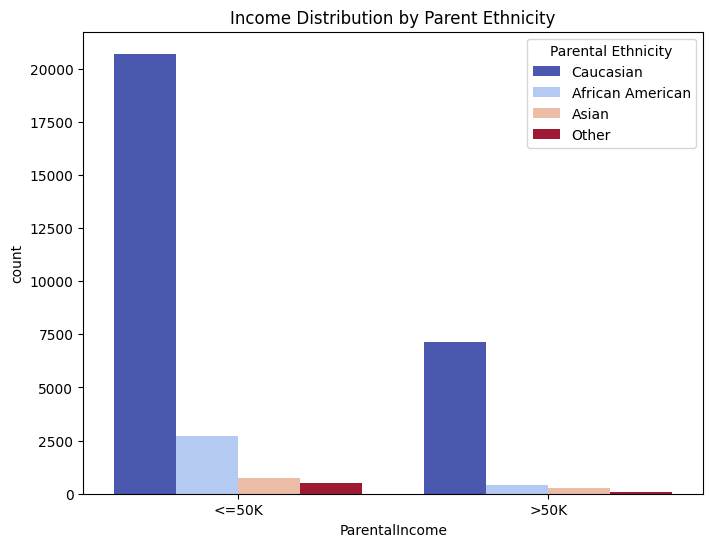

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ParentalIncome", hue="ParentalEthnicity", data=adult_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Caucasian", "African American", "Asian", "Other"], title="Parental Ethnicity")
plt.title("Income Distribution by Parent Ethnicity")
plt.show()

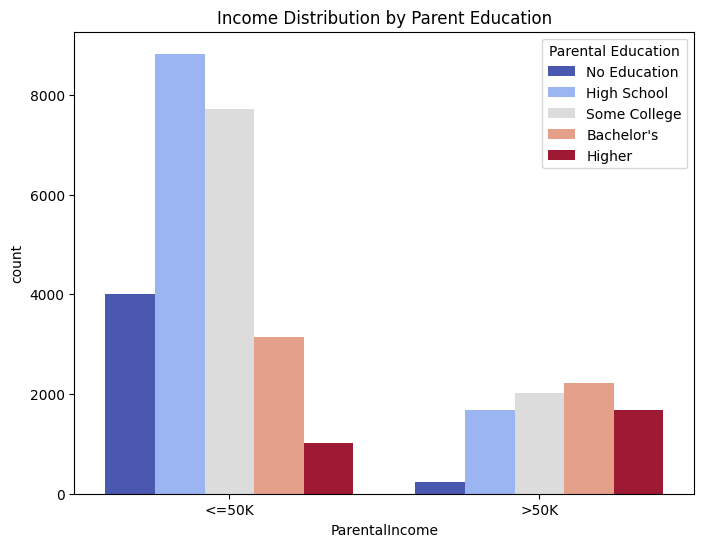

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ParentalIncome", hue="ParentalEducation", data=adult_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Education", "High School", "Some College", "Bachelor's", "Higher"], title="Parental Education")
plt.title("Income Distribution by Parent Education")
plt.show()

# Parent Education Distribution

/var/folders/_j/_1gs8lv530q36879x1r_0n9w0000gn/T/ipykernel_35602/2415295219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ParentalEducation", data=student_df, palette="coolwarm")


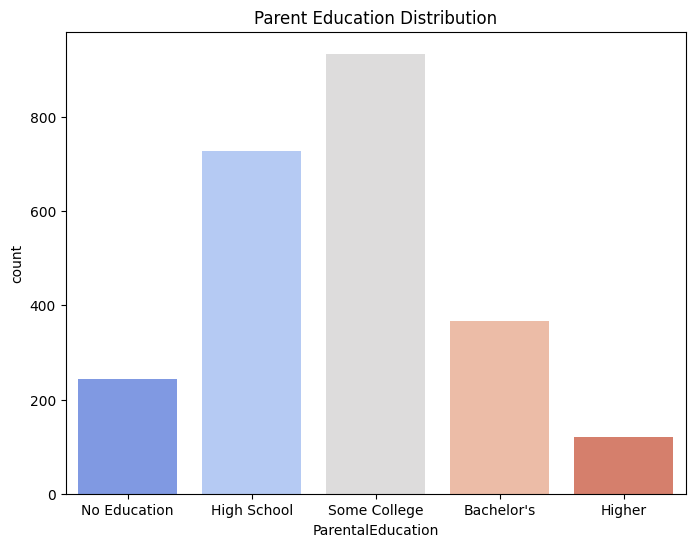

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="ParentalEducation", data=student_df, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["No Education", "High School", "Some College", "Bachelor's", "Higher"])
plt.title("Parent Education Distribution")
plt.show()

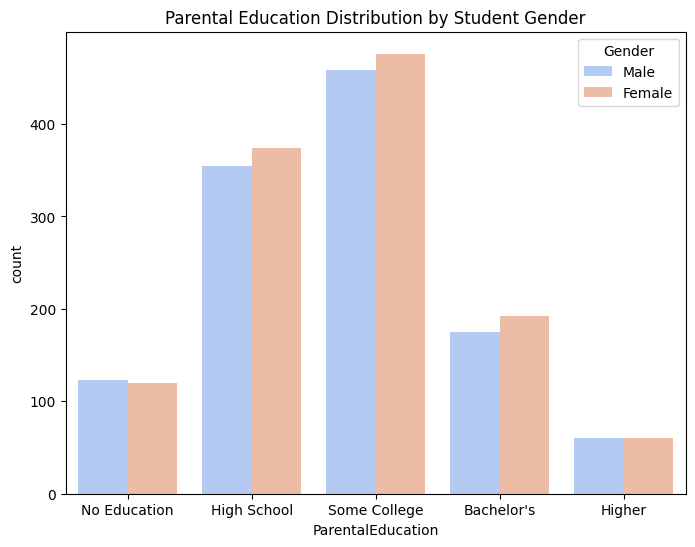

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ParentalEducation", hue="Gender", data=student_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Male", "Female"], title="Gender")
plt.xticks(ticks=[0,1,2,3,4], labels=["No Education", "High School", "Some College", "Bachelor's", "Higher"])
plt.title("Parental Education Distribution by Student Gender")
plt.show()

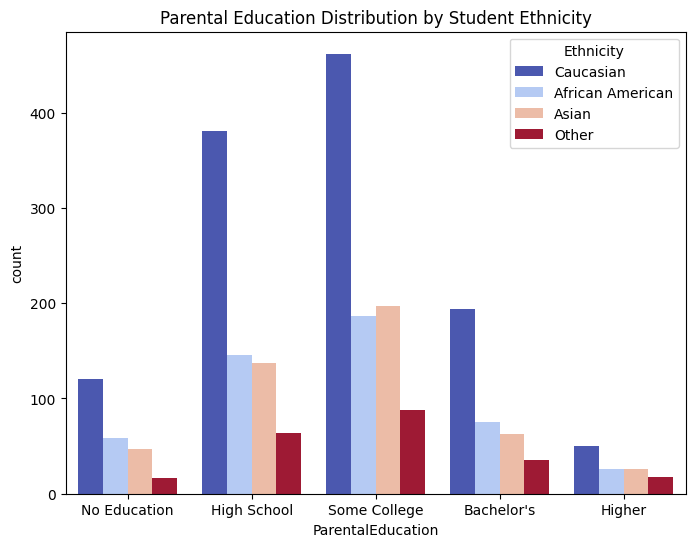

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ParentalEducation", hue="Ethnicity", data=student_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Caucasian", "African American", "Asian", "Other"], title="Ethnicity")
plt.xticks(ticks=[0,1,2,3,4], labels=["No Education", "High School", "Some College", "Bachelor's", "Higher"])
plt.title("Parental Education Distribution by Student Ethnicity")
plt.show()

# Grade Distribution

/var/folders/_j/_1gs8lv530q36879x1r_0n9w0000gn/T/ipykernel_35602/2054676560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="GradeClass", data=student_df, palette="coolwarm")


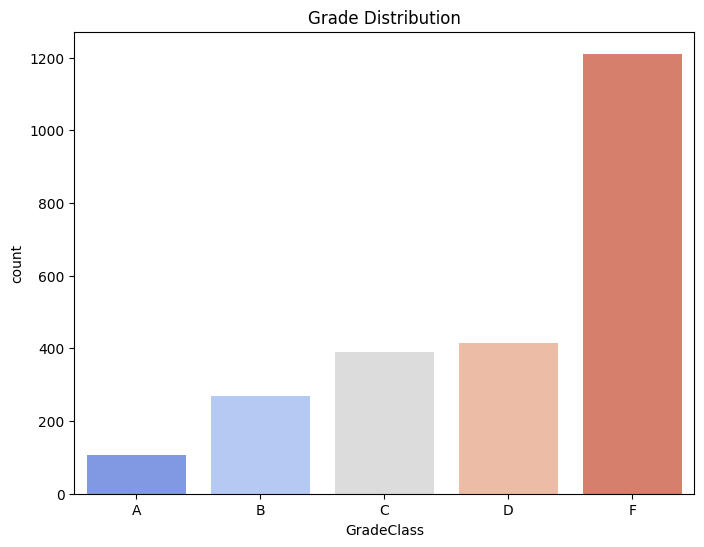

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="GradeClass", data=student_df, palette="coolwarm")
plt.title("Grade Distribution")
plt.xticks(ticks=[0,1,2,3,4], labels=['A', 'B', 'C', 'D', 'F'])
plt.show()

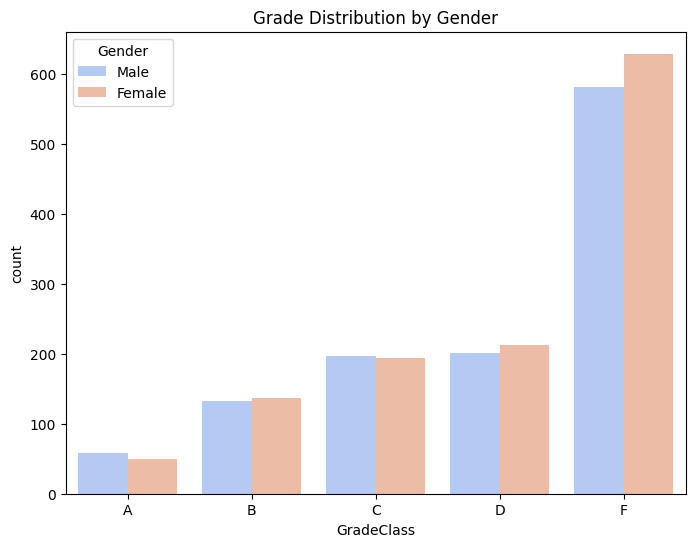

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="GradeClass", hue="Gender", data=student_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Male", "Female"], title="Gender")
plt.title("Grade Distribution by Gender")
plt.xticks(ticks=[0,1,2,3,4], labels=['A', 'B', 'C', 'D', 'F'])
plt.show()


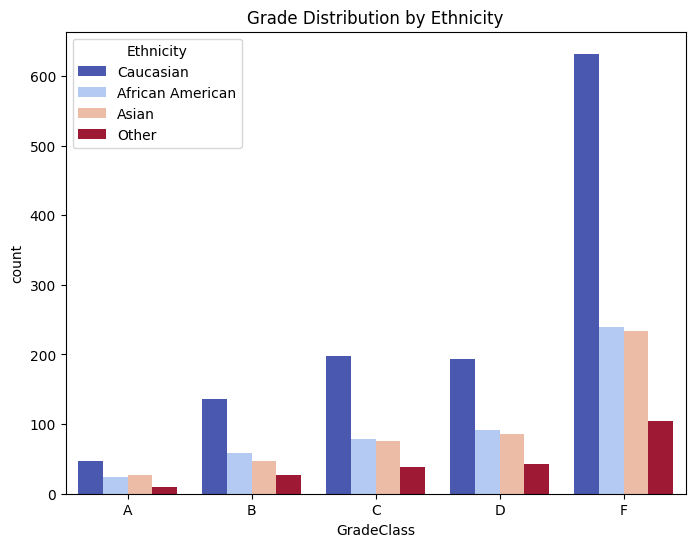

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="GradeClass", hue="Ethnicity", data=student_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Caucasian", "African American", "Asian", "Other"], title="Ethnicity")
plt.title("Grade Distribution by Ethnicity")
plt.xticks(ticks=[0,1,2,3,4], labels=['A', 'B', 'C', 'D', 'F'])
plt.show()

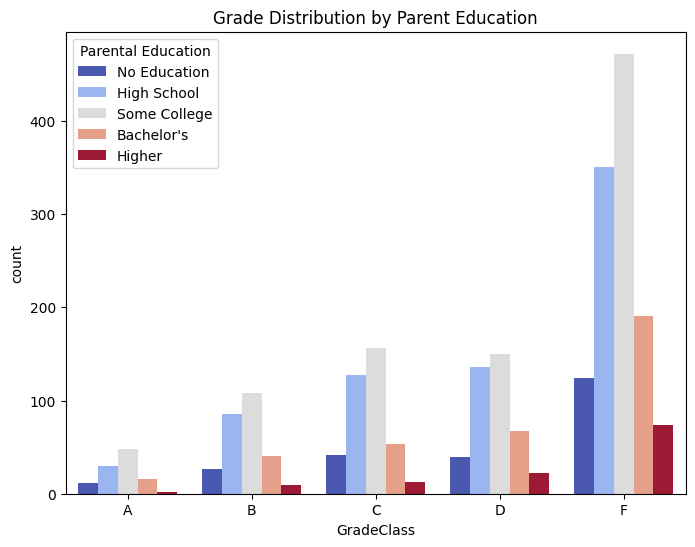

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="GradeClass", hue="ParentalEducation", data=student_df, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Education", "High School", "Some College", "Bachelor's", "Higher"], title="Parental Education")
plt.title("Grade Distribution by Parent Education")
plt.xticks(ticks=[0,1,2,3,4], labels=['A', 'B', 'C', 'D', 'F'])
plt.show()

# GPA Distribution

/var/folders/_j/_1gs8lv530q36879x1r_0n9w0000gn/T/ipykernel_35602/2652789184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="GPA", data=student_df, palette="coolwarm")


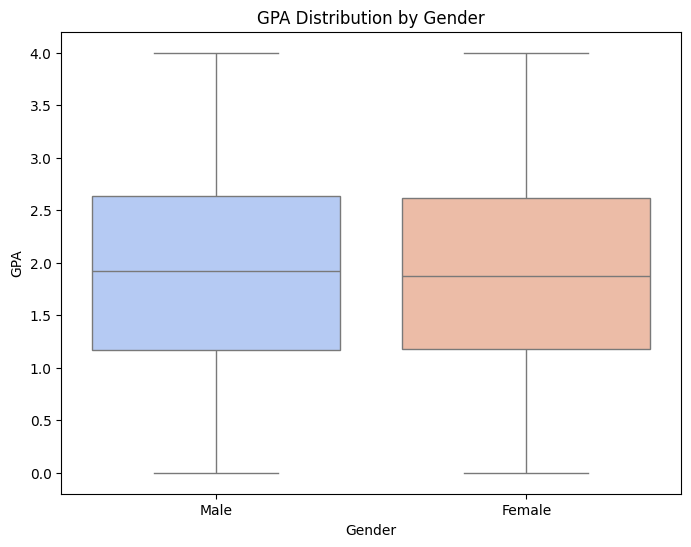

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Gender", y="GPA", data=student_df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.title("GPA Distribution by Gender")
plt.show()

/var/folders/_j/_1gs8lv530q36879x1r_0n9w0000gn/T/ipykernel_35602/2131271307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Ethnicity", y="GPA", data=student_df, palette="coolwarm")


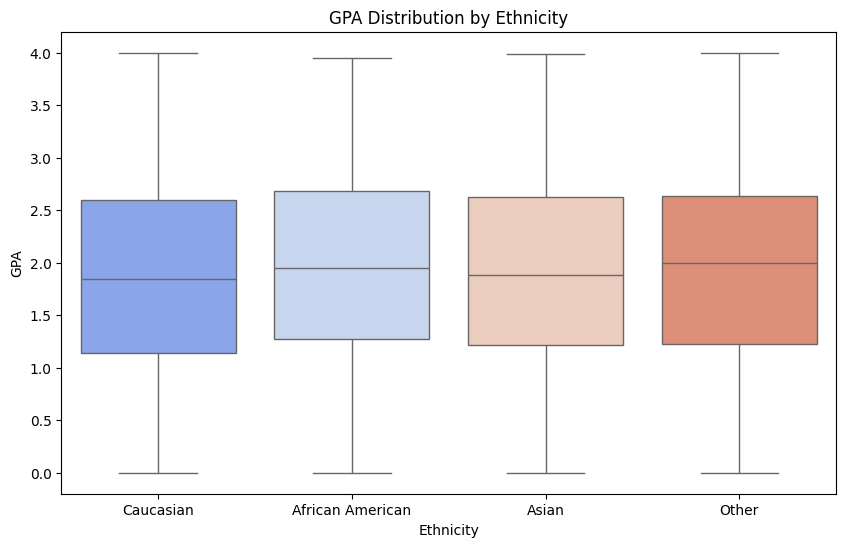

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Ethnicity", y="GPA", data=student_df, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Caucasian", "African American", "Asian", "Other"])
plt.title("GPA Distribution by Ethnicity")
plt.show()

/var/folders/_j/_1gs8lv530q36879x1r_0n9w0000gn/T/ipykernel_35602/4089933419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ParentalEducation", y="GPA", data=student_df, palette="coolwarm")


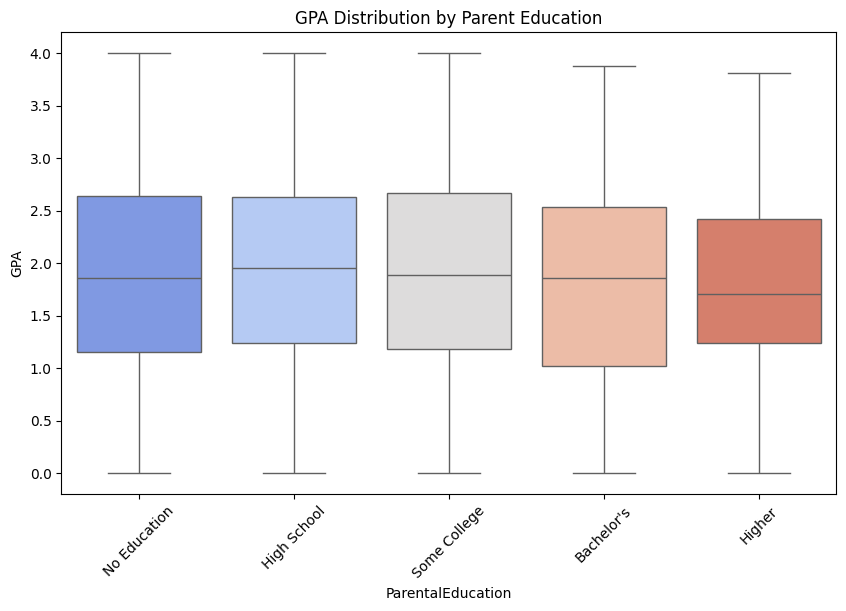

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ParentalEducation", y="GPA", data=student_df, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["No Education", "High School", "Some College", "Bachelor's", "Higher"])
plt.xticks(rotation=45)
plt.title("GPA Distribution by Parent Education")
plt.show()

# Fairness Metrics

### Define the Prediction (Mock or Actual Predictions)
Since we're evaluating *fairness*, we assume that the predicted grade class (``GradePredicted``) is identical to the actual class.

Binarize the ``GradeClass`` into High vs Low Grades:
- Assign 1 for students with grades A or B.
- Assign 0 for students with grades C, D, or F.

In [ ]:
student_df["HighGrade"] = student_df["GradeClass"].apply(lambda x: 1 if x <= 1 else 0)
student_df["GradePredicted"] = student_df["HighGrade"]


### Fairness Evaluation

In [ ]:
dataset_gender = StandardDataset(
    student_df,
    label_name="HighGrade",
    favorable_classes=[1],
    protected_attribute_names=["Gender"],
    privileged_classes=[[1]],
)

dataset_ethnicity = StandardDataset(
    student_df,
    label_name="HighGrade",
    favorable_classes=[1],
    protected_attribute_names=["Ethnicity"],
    privileged_classes=[[1]],
)

dataset_education = StandardDataset(
    student_df,
    label_name="HighGrade",
    favorable_classes=[1],
    protected_attribute_names=["ParentalEducation"],
    privileged_classes=[[1]],
)

In [ ]:
metric_gender = BinaryLabelDatasetMetric(dataset_gender, privileged_groups=[{"Gender": 0}],
                                  unprivileged_groups=[{"Gender": 1}])

metric_ethnicity = BinaryLabelDatasetMetric(dataset_ethnicity, privileged_groups=[{"Ethnicity": 0}],
                                  unprivileged_groups=[{"Ethnicity": 1, "Ethnicity": 2, "Ethnicity": 3}])

metric_education = BinaryLabelDatasetMetric(dataset_education, privileged_groups=[{"ParentalEducation": 4}],
                                  unprivileged_groups=[{"ParentalEducation": 0, "ParentalEducation": 1, "ParentalEducation": 2, "ParentalEducation": 3}])

In [ ]:
print("\nGender Fairness Metrics")
print("Demographic Parity Difference:", metric_gender.mean_difference())  # Should be close to 0 for fairness
print("Disparate Impact Ratio:", metric_gender.disparate_impact())  # Should be close to 1 for fairness

print("\nEthnicity Fairness Metrics")
print("Demographic Parity Difference:", metric_ethnicity.mean_difference())  # Should be close to 0 for fairness
print("Disparate Impact Ratio:", metric_ethnicity.disparate_impact())  # Should be close to 1 for fairness

print("\nParent Education Fairness Metrics")
print("Demographic Parity Difference:", metric_education.mean_difference())  # Should be close to 0 for fairness
print("Disparate Impact Ratio:", metric_education.disparate_impact())  # Should be close to 1 for fairness


Gender Fairness Metrics

Demographic Parity Difference: -0.010183669758137837
Disparate Impact Ratio: 0.9372900335946249
Ethnicity Fairness Metrics

Demographic Parity Difference: 0.010546586354374277
Disparate Impact Ratio: 1.069561364643332
Parent Education Fairness Metrics

Demographic Parity Difference: 0.06092188919164397
Disparate Impact Ratio: 1.664602427545207


In [ ]:
# Train a simple model (Logistic Regression) and compute Equalized Odds
X = student_df.drop(columns=["HighGrade", "GradeClass"])
y = student_df["HighGrade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/joseantonioruizheredia/Code/Python/Analyze_Bias_Fairness/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Convert predictions into AIF360 dataset format
test_dataset = dataset_gender.split([0.7], shuffle=True)[1]  # Use 30% as test set
test_dataset_pred = test_dataset.copy()
test_dataset_pred.labels = y_pred.reshape(-1, 1)

classification_metric = ClassificationMetric(test_dataset, test_dataset_pred,
                                             privileged_groups=[{"Gender": 0}],
                                             unprivileged_groups=[{"Gender": 1}])

print("\nGender Fairness Metrics")
print("Equalized Odds Difference:", classification_metric.equalized_odds_difference())  # Should be close to 0 for fairness
print("False Negative Rate Difference:", classification_metric.false_negative_rate_difference())  # Checks if one group is misclassified more



test_dataset = dataset_ethnicity.split([0.7], shuffle=True)[1]
test_dataset_pred = test_dataset.copy()
test_dataset_pred.labels = y_pred.reshape(-1, 1)

classification_metric = ClassificationMetric(test_dataset, test_dataset_pred,
                                             privileged_groups=[{"Ethnicity": 0}],
                                             unprivileged_groups=[{"Ethnicity": 1, "Ethnicity": 2, "Ethnicity": 3}])

print("\nEthnicity Fairness Metrics")
print("Equalized Odds Difference:", classification_metric.equalized_odds_difference())  # Should be close to 0 for fairness
print("False Negative Rate Difference:", classification_metric.false_negative_rate_difference())  # Checks if one group is misclassified more



test_dataset = dataset_education.split([0.7], shuffle=True)[1]
test_dataset_pred = test_dataset.copy()
test_dataset_pred.labels = y_pred.reshape(-1, 1)

classification_metric = ClassificationMetric(test_dataset, test_dataset_pred,
                                             privileged_groups=[{"ParentalEducation": 4}],
                                             unprivileged_groups=[{"ParentalEducation": 0, "ParentalEducation": 1, "ParentalEducation": 2, "ParentalEducation": 3}])

print("\nParent Education Fairness Metrics")
print("Equalized Odds Difference:", classification_metric.equalized_odds_difference())  # Should be close to 0 for fairness
print("False Negative Rate Difference:", classification_metric.false_negative_rate_difference())  # Checks if one group is misclassified more

Gender Fairness Metrics

Equalized Odds Difference: 0.033786137234413094
False Negative Rate Difference: 0.027079303675048405
Ethnicity Fairness Metrics

Equalized Odds Difference: 0.09090909090909091
False Negative Rate Difference: 0.09090909090909094
Parent Education Fairness Metrics

Equalized Odds Difference: 0.15
False Negative Rate Difference: 0.15000000000000002
